# Análise de dados e introdução a Regressão

Vamos utilizar um dataset de uma amostra da população brasileira para treinar nossos conceitos de regressão.

Nesse dataset temos informações sobre 66470 invidividuos pesquisados pelo censo e extraimos 8 variáveis:
- id
- idade
- sexo
- cor/raca
- salario
- estado_civil
- regiao
- Educação


Nossos pontos de interesse serão:

- Análise multivariada.
- Transformações nas distribuições para serem usadas em uma regressão.
- Tratamento de variáveis categóricas.
- O que seria afinal uma variável categórica?

Algumas perguntas que poderemos responder:

- Pessoas casadas ganham mais que pessoas solteiras?
- Existe diferença salarial entre as diferentes regiões do país?
- O salário aumenta com a idade?
- Vale a pena estudar mais para ganhar maiores salarios? Estudar até quando?

In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
df = pd.read_csv(r'./data/data.csv')

In [3]:
df.head(10)

,Unnamed: 0,id,idade,sexo,anos_estudo,cor/raca,salario,estado_civil,regiao
0,0,1.100190e+10,53,homem,5.0,Parda,63600.000000,1.0,norte
1,1,1.100190e+10,49,mulher,8.0,Amarela,NaN,1.0,norte
2,2,1.100190e+10,22,mulher,11.0,Indigena,4352.400391,0.0,nordeste
3,3,1.100190e+10,55,homem,15.0,Amarela,96600.000000,1.0,norte
4,4,1.100190e+10,56,mulher,15.0,Amarela,157800.000000,1.0,norte
5,5,1.100190e+10,30,mulher,15.0,Amarela,88550.000000,0.0,nordeste
6,6,1.100190e+10,52,mulher,5.0,Branca,6734.400391,0.0,norte
7,7,1.100190e+10,29,homem,5.0,Parda,14875.200684,0.0,norte
8,8,1.100190e+10,29,mulher,11.0,Parda,6734.400391,0.0,norte
9,9,1.100191e+10,46,mulher,15.0,Branca,54300.000000,1.0,norte


# Vamos olhar as estátisticas descritivas desses dados.

In [4]:
df.describe() # Apenas variáveis numéricas aparecem no describe

,Unnamed: 0,id,idade,anos_estudo,salario,estado_civil
count,66470.000000,6.647000e+04,66470.000000,66036.000000,47878.000000,66470.000000
mean,33234.500000,3.445307e+10,37.634813,8.686065,19706.790323,0.587724
std,19188.380534,1.292491e+10,11.380158,3.374522,88627.532024,0.492248
min,0.000000,1.100190e+10,20.000000,5.000000,-1.000000,0.000000
25%,16617.250000,3.110060e+10,28.000000,5.000000,3780.000000,0.000000
50%,33234.500000,3.316781e+10,37.000000,8.000000,7113.599609,1.000000
75%,49851.750000,4.310361e+10,47.000000,11.000000,12720.000000,1.000000
max,66469.000000,5.311702e+10,60.000000,15.000000,999999.000000,1.000000


In [5]:
df.isnull().sum().sort_values(ascending=False).head(4)

salario        18592
anos_estudo      434
cor/raca         242
regiao             0
dtype: int64

In [6]:
(df.isnull().sum()/df.isnull().count()).sort_values(ascending=False).head(4)

salario        0.279705
anos_estudo    0.006529
cor/raca       0.003641
regiao         0.000000
dtype: float64

In [7]:
# correlação entre todas as variaveis:
df.corr().round(4)

,Unnamed: 0,id,idade,anos_estudo,salario,estado_civil
Unnamed: 0,1.0000,0.9704,0.0450,0.0173,0.0182,0.0357
id,0.9704,1.0000,0.0520,0.0357,0.0223,0.0295
idade,0.0450,0.0520,1.0000,-0.2232,0.1222,0.2100
anos_estudo,0.0173,0.0357,-0.2232,1.0000,0.1014,-0.1188
salario,0.0182,0.0223,0.1222,0.1014,1.0000,0.0310
estado_civil,0.0357,0.0295,0.2100,-0.1188,0.0310,1.0000


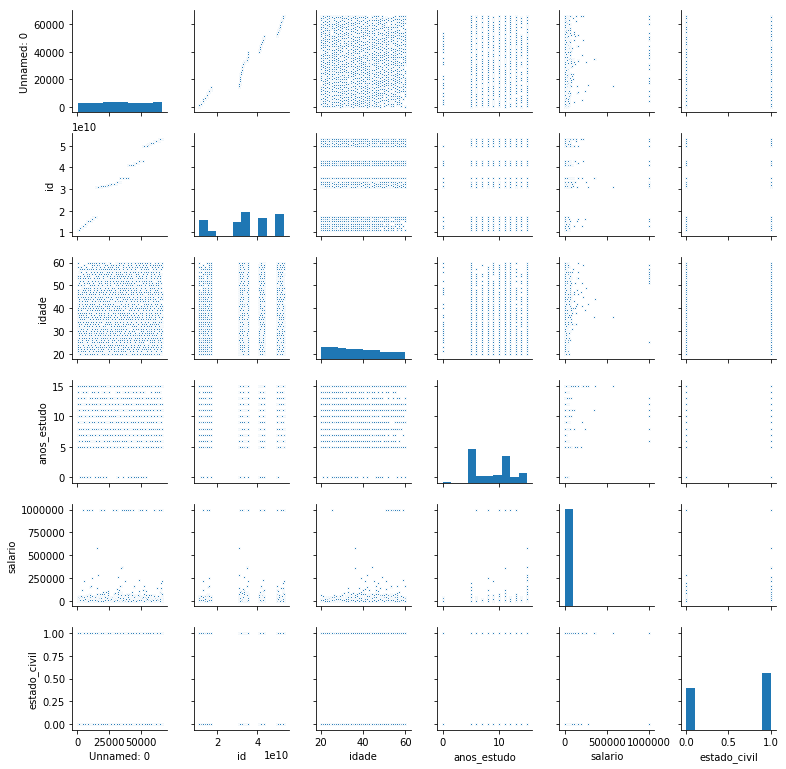

In [8]:
sns.pairplot(
    data=df.fillna(0).sample(5000),
    size=1.8,
    plot_kws={'s': 5})

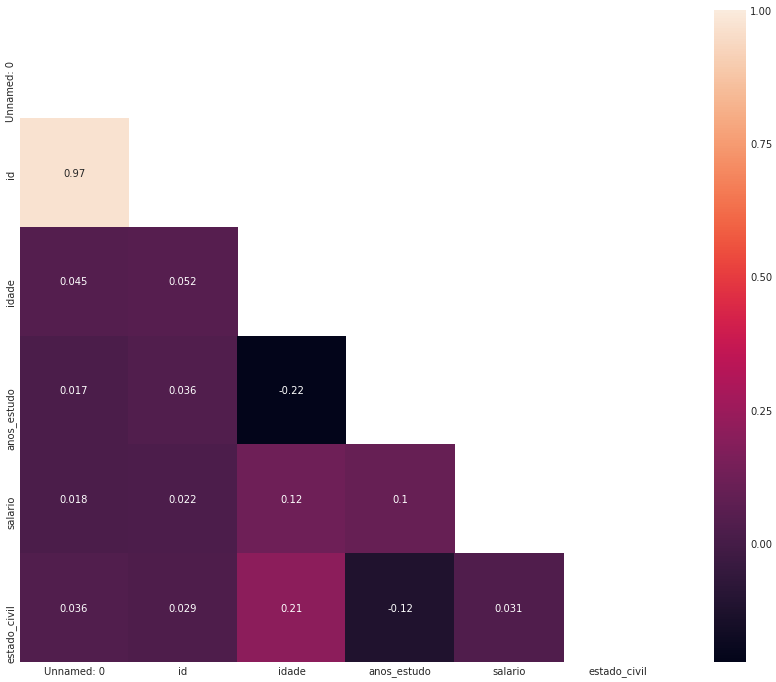

In [9]:
corr = df.corr()
mask = np.zeros_like(corr) # removendo valores zero
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    fig, ax = plt.subplots(figsize=(15, 12));
    
    sns.heatmap(
        corr,
        ax=ax,
        annot=True,
        mask=mask,
        square=True
    );

# 1. Qual a relação entre idade e salario?

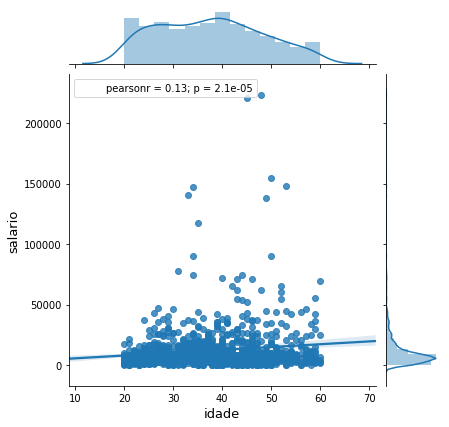

In [10]:
# Não nos ajuda a ver o que precisamos.
temp = df[df.salario<999999].sample(1000)
sns.jointplot(x="idade", y="salario", data=temp, kind='reg') # hue='estado_civil'
plt.ylabel('salario', fontsize=13)
plt.xlabel('idade', fontsize=13)
plt.show()

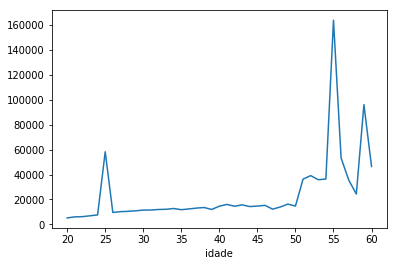

In [11]:
df.groupby('idade')['salario'].mean().plot()

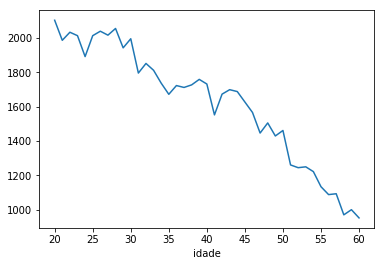

In [12]:
df.groupby('idade')['salario'].size().plot()

In [13]:
def run_regression(df,function):
    model = smf.ols(function, df).fit()
    print(model.summary())

In [14]:
mascara = df.salario < 999999
run_regression(df[mascara],'salario ~ idade')

                            OLS Regression Results                            
Dep. Variable:                salario   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     653.6
Date:                Tue, 12 Feb 2019   Prob (F-statistic):          3.43e-143
Time:                        10:19:55   Log-Likelihood:            -5.3961e+05
No. Observations:               47511   AIC:                         1.079e+06
Df Residuals:                   47509   BIC:                         1.079e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3702.7591    343.225     10.788      0.0

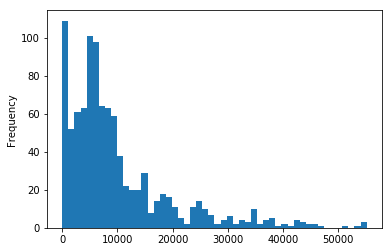

In [15]:
# Será que essa distribuição dos salarios é normal? 
temp[temp.salario<60000].salario.plot.hist(bins=50)

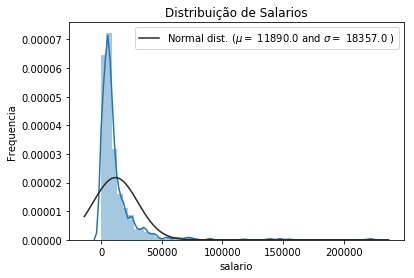

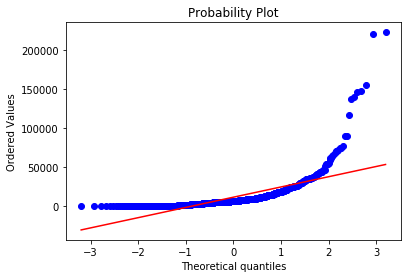

In [16]:
# Parece que não né, vamos comparar graficamente.
sns.distplot(temp['salario'].fillna(0), fit=stats.norm);

(mu, sigma) = stats.norm.fit(temp['salario'].fillna(0))
plt.legend([f'Normal dist. ($\mu=$ {round(mu,0)} and $\sigma=$ {round(sigma,0)} )'],loc='best')
plt.ylabel('Frequencia')
plt.title('Distribuição de Salarios')

fig = plt.figure()
res = stats.probplot(temp['salario'], plot=plt)
plt.show()

Para variáveis com valores "explosivos" ou com excesso de outliers (ou em casos mais complexos com excesso de [heterocedasticidade](https://pt.wikipedia.org/wiki/Heteroscedasticidade)) devemos [transformar](https://en.wikipedia.org/wiki/Data_transformation_(statistics) a amostra com a função log.

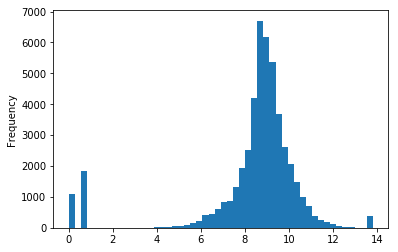

In [17]:
df['log_salario'] = np.log(df['salario']+2)
df['log_salario'].plot.hist(bins=50)

In [18]:
np.exp(9)

8103.083927575384

In [19]:
temp = df[(df.log_salario > 2) & (df.salario<999999)]

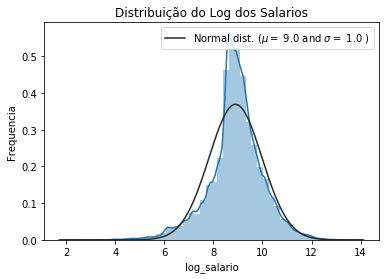

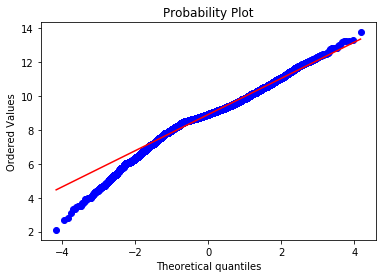

In [20]:
# Parece que não né, vamos comparar graficamente.
sns.distplot(temp['log_salario'].fillna(0), fit=stats.norm);

(mu, sigma) = stats.norm.fit(temp['log_salario'].fillna(0))
plt.legend([f'Normal dist. ($\mu=$ {round(mu,0)} and $\sigma=$ {round(sigma,0)} )'],loc='best')
plt.ylabel('Frequencia')
plt.title('Distribuição do Log dos Salarios')

fig = plt.figure()
res = stats.probplot(temp['log_salario'], plot=plt)
plt.show()

# 2. Qual a relação entre educação e salario?

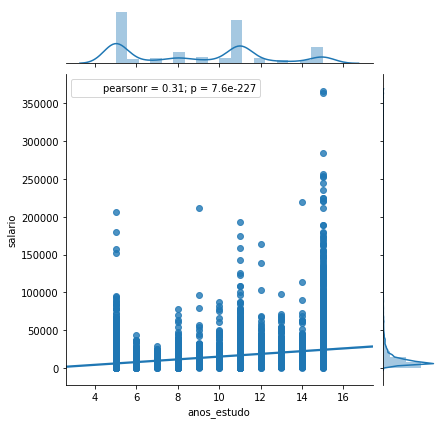

In [21]:
# Novamente a viz não nos ajuda a ver alguma relação.
sns.jointplot(x="anos_estudo", y="salario", data=temp.sample(10000), kind='reg') # hue='estado_civil'

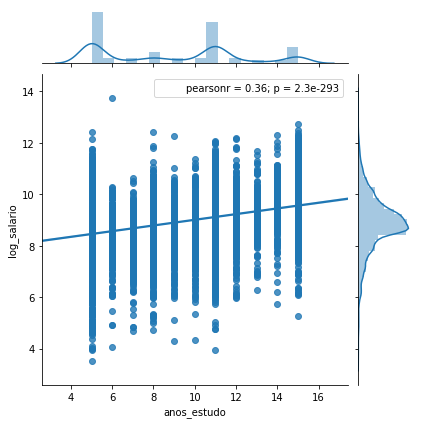

In [22]:
sns.jointplot(x="anos_estudo", y="log_salario", data=temp.sample(10000), kind='reg') # hue='estado_civil'

In [23]:
run_regression(temp,'salario ~ anos_estudo')

                            OLS Regression Results                            
Dep. Variable:                salario   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     4171.
Date:                Tue, 12 Feb 2019   Prob (F-statistic):               0.00
Time:                        10:19:59   Log-Likelihood:            -5.0184e+05
No. Observations:               44243   AIC:                         1.004e+06
Df Residuals:                   44241   BIC:                         1.004e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -3387.9726    271.150    -12.495      

In [24]:
run_regression(temp,'log_salario ~ anos_estudo')

                            OLS Regression Results                            
Dep. Variable:            log_salario   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     6243.
Date:                Tue, 12 Feb 2019   Prob (F-statistic):               0.00
Time:                        10:19:59   Log-Likelihood:                -63290.
No. Observations:               44243   AIC:                         1.266e+05
Df Residuals:                   44241   BIC:                         1.266e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       7.9101      0.013    588.615      

In [25]:
# Ao Adicionar idade na regressão de anos de estudo saimos da regressão simples e vamos
# para a regressão multipla, no output não muda quase nada, apenas uma linha a mais.
# Mas a interpretação muda muito! O parâmetro de anos de estudo deviam aumentar ou diminuir
# incluindo idade? Essa questão deixa de ser intuitiva ...

run_regression(temp,'log_salario ~ anos_estudo + idade')

                            OLS Regression Results                            
Dep. Variable:            log_salario   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     4387.
Date:                Tue, 12 Feb 2019   Prob (F-statistic):               0.00
Time:                        10:19:59   Log-Likelihood:                -62208.
No. Observations:               44243   AIC:                         1.244e+05
Df Residuals:                   44240   BIC:                         1.244e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       7.0103      0.023    302.528      

# Investigando a relação entre salário e estado civil

In [26]:
df[['salario', 'estado_civil']].head(10)

,salario,estado_civil
0,63600.000000,1.0
1,NaN,1.0
2,4352.400391,0.0
3,96600.000000,1.0
4,157800.000000,1.0
5,88550.000000,0.0
6,6734.400391,0.0
7,14875.200684,0.0
8,6734.400391,0.0
9,54300.000000,1.0


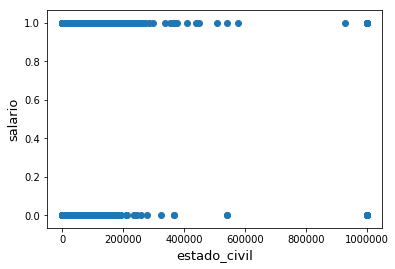

In [27]:
# Não nos ajuda a ver o que precisamos.
fig, ax = plt.subplots()
ax.scatter(x = df['salario'], y = df['estado_civil'])
plt.ylabel('salario', fontsize=13)
plt.xlabel('estado_civil', fontsize=13)
plt.show()

In [28]:
df[df.estado_civil == 1]['salario'].mean()

21893.607440356824

In [29]:
df[df.estado_civil == 1]['salario'].std()

93935.88880512808

In [30]:
df[df.estado_civil == 0]['salario'].mean()

16251.204448112616

In [31]:
df[df.estado_civil == 0]['salario'].std()

79399.95692962855

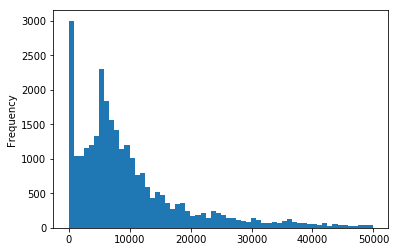

In [32]:
mascara_salario_alto = df.salario<50000
mascara_casado = df.estado_civil == 1
df[(mascara_salario_alto) & (mascara_casado)]['salario'].plot.hist(bins=60)

In [33]:
mascara_salario_baixo = df.salario > 50
mascara_casado = df.estado_civil == 1
mascara_nao_casado = df.estado_civil == 0

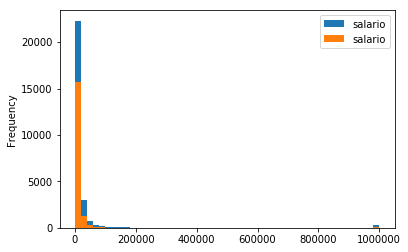

In [34]:
df[(mascara_salario_baixo) & (mascara_casado)]['salario'].plot.hist(bins=50)
df[(mascara_salario_baixo) & (mascara_nao_casado)]['salario'].plot.hist(bins=50)
plt.legend()
plt.show()

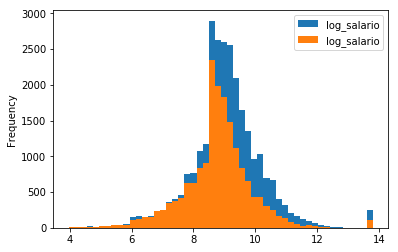

In [35]:
df[(mascara_salario_baixo) & (mascara_casado)]['log_salario'].plot.hist(bins=50)
df[(mascara_salario_baixo) & (mascara_nao_casado)]['log_salario'].plot.hist(bins=50)
plt.legend()
plt.show()

In [36]:
function1 = '''log_salario ~ idade + anos_estudo + estado_civil'''

model1 = smf.ols(function1, temp).fit()

print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:            log_salario   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     3226.
Date:                Tue, 12 Feb 2019   Prob (F-statistic):               0.00
Time:                        10:20:01   Log-Likelihood:                -61834.
No. Observations:               44243   AIC:                         1.237e+05
Df Residuals:                   44239   BIC:                         1.237e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.9259      0.023    298.759   

In [37]:
# O que o statsmodel fez foi criar uma dummy, ou seja, um valor categórico que assume 0 ou 1.
# Em outros algoritmos temos que fazer isso explicitamente.

pd.get_dummies(df).head(10)

,Unnamed: 0,id,idade,anos_estudo,salario,estado_civil,log_salario,sexo_gestante,sexo_homem,sexo_mulher,cor/raca_Amarela,cor/raca_Branca,cor/raca_Indigena,cor/raca_Parda,cor/raca_Preta,regiao_centro-oeste,regiao_nordeste,regiao_norte,regiao_sudeste,regiao_sul
0,0,1.100190e+10,53,5.0,63600.000000,1.0,11.060400,0,1,0,0,0,0,1,0,0,0,1,0,0
1,1,1.100190e+10,49,8.0,NaN,1.0,NaN,0,0,1,1,0,0,0,0,0,0,1,0,0
2,2,1.100190e+10,22,11.0,4352.400391,0.0,8.378942,0,0,1,0,0,1,0,0,0,1,0,0,0
3,3,1.100190e+10,55,15.0,96600.000000,1.0,11.478355,0,1,0,1,0,0,0,0,0,0,1,0,0
4,4,1.100190e+10,56,15.0,157800.000000,1.0,11.969096,0,0,1,1,0,0,0,0,0,0,1,0,0
5,5,1.100190e+10,30,15.0,88550.000000,0.0,11.391345,0,0,1,1,0,0,0,0,0,1,0,0,0
6,6,1.100190e+10,52,5.0,6734.400391,0.0,8.815281,0,0,1,0,1,0,0,0,0,0,1,0,0
7,7,1.100190e+10,29,5.0,14875.200684,0.0,9.607585,0,1,0,0,0,0,1,0,0,0,1,0,0
8,8,1.100190e+10,29,11.0,6734.400391,0.0,8.815281,0,0,1,0,0,0,1,0,0,0,1,0,0
9,9,1.100191e+10,46,15.0,54300.000000,1.0,10.902316,0,0,1,0,1,0,0,0,0,0,1,0,0


# Adicionando mais variáveis.

In [38]:
run_regression(df,'''log_salario ~ idade +
sexo +
anos_estudo +
estado_civil +
regiao''')

                            OLS Regression Results                            
Dep. Variable:            log_salario   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     687.0
Date:                Tue, 12 Feb 2019   Prob (F-statistic):               0.00
Time:                        10:20:01   Log-Likelihood:            -1.0491e+05
No. Observations:               47538   AIC:                         2.098e+05
Df Residuals:                   47528   BIC:                         2.099e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              5.7717      0

# Deep Dive nos pré-requisitos do modelo de regressão Linear

In [39]:
yhat = model1.predict()
ytrue = temp.log_salario

In [40]:
len(yhat)

44243

In [41]:
len(ytrue)

44569

In [42]:
erro = ytrue - yhat
erro

ValueError: operands could not be broadcast together with shapes (44569,) (44243,) 

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
sns.kdeplot(ytrue, shade=True, label='logsalario')
sns.kdeplot(yhat, shade=True, label='Predicted Values')
sns.kdeplot(ytrue-yhat, shade=True, label='Prediction Errors');

As variáveis tem uma relação linear?

In [ ]:
sns.jointplot(predicted, y_test, kind='reg')
plt.xlabel('Predicted Values ($\hat y$)')
plt.ylabel('House Values ($y$)');

Os erros são independentes?

In [ ]:
# Em uma cross-section precisamos entender como os dados foram construidos.
# Em uma série de tempo/espaço analisamos se o tempo atual tem relação com o tempo passado. 
# ou no espaço, se a posição atual tem relação com as posições ao redor.
from pandas.plotting import lag_plot
lag_plot(y_test-predicted)

Os erros tem distribuição normal?

In [ ]:
# Plotar a distribuição/histograma e comparar com uma curva normal geralmente é suficiente
# para dizer que nossos erros/rezidos são normalmente distribuidos.
# do contrário podemos supor que existe alguma variável importante que não foi incluida no modelo
# e portanto tornando nossos parâmetros betas estimados enviesados.
# Com uma amostra de reduzidos normalmente distribuida, há mais indicios para dizer que ela é
# causada por alguma aleatoriedade. Mais uma palavra para nosso vocabulario é "idiossincratico"
# que sifnifica basicamente que o que explica a diferença dos valores previstos para os observados
# são causados por coisas muito particulares das observações que não devem ser consideradas no modelo,
# a essas caracteristicas particulares damos o nome de caracteristicas idiossincraticas.

In [ ]:
from scipy.stats import normaltest
normaltest(y_test-predicted)

In [ ]:
# A variância sigma2 das variaveis não dependem no nível da variável (são constantes)